## Hospedagens em Recife
Buscamos analisar as mudanças sazonais do preço das hospedagens em recife

In [2]:
import pandas as pd
import numpy as np

In [3]:
# carregando o dataset completo
hosp = pd.read_csv('../resultado1.csv', decimal=".")

## Definindo o tipo dos dados

In [4]:
hosp['checkin'] = pd.to_datetime(hosp['checkin'])
hosp['checkout'] = pd.to_datetime(hosp['checkout'])
hosp['cidade'] = hosp["cidade"].astype("category")
hosp['hotel'] = hosp["hotel"].astype("category")
hosp['data_extracao'] = hosp["data_extracao"].astype("category")

In [5]:
# pegando do dataset apenas os dados até junho de 2025 para comparar um ano inteiro sem repetições
hospedagens = hosp[~((hosp['checkin'].dt.month > 6) & (hosp['checkin'].dt.year == 2025))]


In [15]:
# confirmando o tipo dos dados
hospedagens.dtypes

hotel                    category
cidade                   category
preço                       int64
checkin            datetime64[ns]
checkout           datetime64[ns]
dist_centro               float64
dist_praia                float64
avaliacao                 float64
qtnd_avaliacoes           float64
data_extracao            category
dtype: object

## Estatísticas Iniciais

In [16]:
# tamanho dos dados
hospedagens.shape

(15643, 10)

In [17]:
# visualizando as colunas 
hospedagens.columns

Index(['hotel', 'cidade', 'preço', 'checkin', 'checkout', 'dist_centro',
       'dist_praia', 'avaliacao', 'qtnd_avaliacoes', 'data_extracao'],
      dtype='object')

In [18]:
# agrupamos os dados por mês para entender a média dos preços de cada mês
preco_medio_mensal = hospedagens.groupby(pd.Grouper(key='checkin', freq="M"))['preço'].mean()
preco_medio_mensal

C:\Users\extre\AppData\Local\Temp\ipykernel_19640\366261908.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  preco_medio_mensal = hospedagens.groupby(pd.Grouper(key='checkin', freq="M"))['preço'].mean()


checkin
2024-07-31    1853.438967
2024-08-31    1852.081880
2024-09-30    1936.745310
2024-10-31    1977.388763
2024-11-30    2011.614892
2024-12-31    2269.954579
2025-01-31    2461.325480
2025-02-28    2248.170360
2025-03-31    2720.275000
2025-04-30    2325.341146
2025-05-31    2297.971154
2025-06-30    2122.087601
Freq: ME, Name: preço, dtype: float64

In [19]:
# número de acomodações aparecendo por mês
num_hospedagens_mes = hospedagens.groupby(pd.Grouper(key='checkin', freq="M"))['preço'].count()
num_hospedagens_mes

C:\Users\extre\AppData\Local\Temp\ipykernel_19640\4288441743.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  num_hospedagens_mes = hospedagens.groupby(pd.Grouper(key='checkin', freq="M"))['preço'].count()


checkin
2024-07-31    2130
2024-08-31    2064
2024-09-30    1759
2024-10-31    1762
2024-11-30    1719
2024-12-31    1343
2025-01-31    1146
2025-02-28     722
2025-03-31     760
2025-04-30     768
2025-05-31     728
2025-06-30     742
Freq: ME, Name: preço, dtype: int64

In [23]:
# calculando o desvio padrão dos preços médios dos meses
preco_medio_mensal['price_change'] = preco_medio_mensal.std()
preco_medio_mensal['price_change']


507.22985390756304

<Axes: >

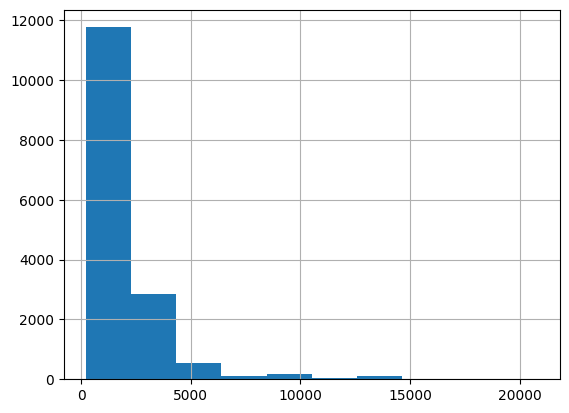

In [6]:
# hiistograma do preço de estadia por 7 dias
hospedagens['preço'].hist()

C:\Users\extre\AppData\Local\Temp\ipykernel_9044\690311496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospedagens['log_price'] = hospedagens['preço'].apply(np.log10)


<Axes: >

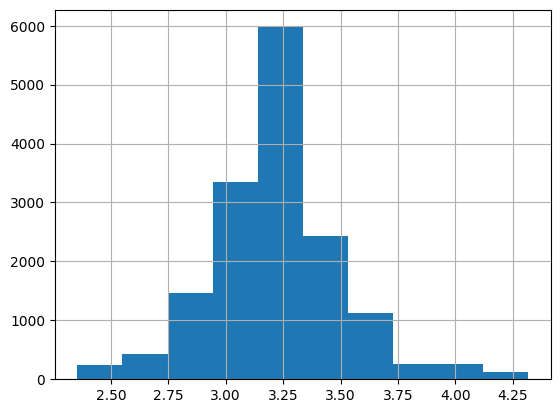

In [7]:
hospedagens['log_price'] = hospedagens['preço'].apply(np.log10)
hospedagens[hospedagens['log_price'] > 0]['log_price'].hist()

## Definindo dados faltantes

In [8]:
# printando quantas linhas de cada coluna está faltante
print(hospedagens.isnull().sum())

hotel                 0
cidade                0
preço                 0
checkin               0
checkout              0
dist_centro           0
dist_praia         4606
avaliacao          3133
qtnd_avaliacoes    3133
data_extracao         0
log_price             0
dtype: int64


<Axes: >

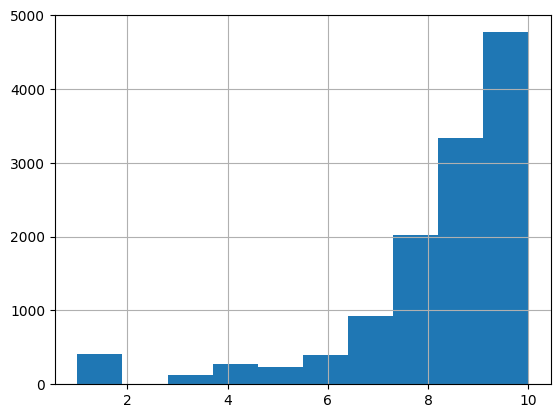

In [14]:
# vamos plotar histogramas das colunas com dados faltantes para entender as particularidades
hospedagens["avaliacao"].hist()

<Axes: >

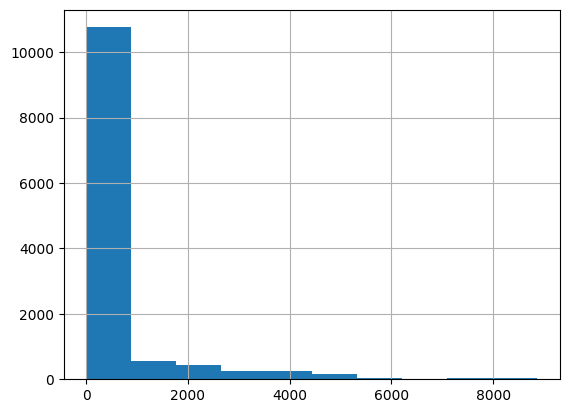

In [12]:
hospedagens["qtnd_avaliacoes"].hist()

<Axes: >

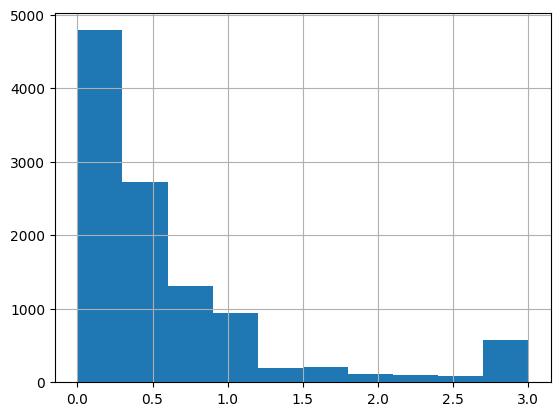

In [13]:
hospedagens["dist_praia"].hist()

In [9]:
# gerando um novo dataset a partir do csv com os dados e transformando os dados categóricos em numérico
hosp_input = pd.read_csv('../resultado1.csv', decimal=".")
hosp_input['checkin'] = pd.to_datetime(hosp_input['checkin'])
hosp_inputedagens = hosp_input[~((hosp_input['checkin'].dt.month > 6) & (hosp_input['checkin'].dt.year == 2025))]
hosp_input['checkin'] = hosp_input['checkin'].astype("category")
hosp_input['checkout'] = hosp_input['checkout'].astype("category")
hosp_input['cidade'] = hosp_input["cidade"].astype("category")
hosp_input['hotel'] = hosp_input["hotel"].astype("category")
hosp_input['data_extracao'] =hosp_input["data_extracao"].astype("category")
hosp_input['hotel'] = hosp_input['hotel'].cat.codes
hosp_input['checkin'] = hosp_input['checkin'].cat.codes
hosp_input['checkout'] = hosp_input['checkout'].cat.codes
hosp_input['cidade'] = hosp_input['cidade'].cat.codes
hosp_input['data_extracao'] = hosp_input['data_extracao'].cat.codes

In [10]:
# entendendo a correlação dos dados a partir do método spearman
hosp_input.corr(method="spearman")

,hotel,cidade,preço,checkin,checkout,dist_centro,dist_praia,avaliacao,qtnd_avaliacoes,data_extracao
hotel,1.000000,NaN,-0.042618,-0.038618,-0.038614,-0.049422,0.071000,-0.137858,0.132421,NaN
cidade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preço,-0.042618,NaN,1.000000,0.044975,0.045242,0.117771,-0.174187,0.119423,0.059913,NaN
checkin,-0.038618,NaN,0.044975,1.000000,0.990569,-0.011076,0.025473,0.028097,-0.099139,NaN
checkout,-0.038614,NaN,0.045242,0.990569,1.000000,-0.010688,0.025448,0.027424,-0.098397,NaN
dist_centro,-0.049422,NaN,0.117771,-0.011076,-0.010688,1.000000,-0.207954,-0.048533,0.152088,NaN
dist_praia,0.071000,NaN,-0.174187,0.025473,0.025448,-0.207954,1.000000,-0.058528,-0.223552,NaN
avaliacao,-0.137858,NaN,0.119423,0.028097,0.027424,-0.048533,-0.058528,1.000000,-0.216860,NaN
qtnd_avaliacoes,0.132421,NaN,0.059913,-0.099139,-0.098397,0.152088,-0.223552,-0.216860,1.000000,NaN
data_extracao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# normalizando os dados
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['preço', 'dist_centro', 'dist_praia' 'avaliacao', 'qtnd_avaliacoes']
scaler = MinMaxScaler()

hosp_input[columns_to_normalize] = scaler.fit_transform(hosp_input[columns_to_normalize])

print(hosp_input)

       hotel  cidade     preço  checkin  checkout  dist_centro  dist_praia  \
0        476       0  0.074051        0         3     0.088565        0.50   
1        496       0  0.067001        0         3     0.050448        0.25   
2        699       0  0.009822        0         3     0.000000        2.50   
3         15       0  0.038168        0         3     0.011211         NaN   
4        695       0  0.074148        0         3     0.076233        0.65   
...      ...     ...       ...      ...       ...          ...         ...   
16900    410       0  0.209899       54        53     0.048206        0.20   
16901    459       0  0.126854       54        53     0.098655        0.90   
16902    527       0  0.131716       54        53     0.183857        0.50   
16903     20       0  0.185054       54        53     0.091928         NaN   
16904    216       0  0.785433       54        53     0.060538         NaN   

       avaliacao  qtnd_avaliacoes  data_extracao  
0       0.75

In [20]:
# rodando o KNN impute para imputar os dados faltantes
from fancyimpute import KNN
hosp_knn = KNN(k=3).fit_transform(hosp_input)

Imputing row 1/16905 with 0 missing, elapsed time: 53.900
Imputing row 101/16905 with 0 missing, elapsed time: 53.980
Imputing row 201/16905 with 0 missing, elapsed time: 54.028
Imputing row 301/16905 with 0 missing, elapsed time: 54.067
Imputing row 401/16905 with 0 missing, elapsed time: 54.171
Imputing row 501/16905 with 0 missing, elapsed time: 54.241
Imputing row 601/16905 with 1 missing, elapsed time: 54.279
Imputing row 701/16905 with 0 missing, elapsed time: 54.316
Imputing row 801/16905 with 0 missing, elapsed time: 54.363
Imputing row 901/16905 with 3 missing, elapsed time: 54.413
Imputing row 1001/16905 with 0 missing, elapsed time: 54.482
Imputing row 1101/16905 with 0 missing, elapsed time: 54.519
Imputing row 1201/16905 with 0 missing, elapsed time: 54.552
Imputing row 1301/16905 with 0 missing, elapsed time: 54.597
Imputing row 1401/16905 with 0 missing, elapsed time: 54.649
Imputing row 1501/16905 with 0 missing, elapsed time: 54.721
Imputing row 1601/16905 with 0 missi

In [21]:
hosp2 = pd.DataFrame(data=hosp_knn[0:,0:],columns=['hotel', 'cidade', 'preço', 'checkin', 'checkout', 'dist_centro', 'dist_praia','avaliacao', 'qtnd_avaliacoes', 'data_extracao'])

In [25]:
# revertendo a normalização
hosp2[columns_to_normalize] = scaler.inverse_transform(hosp2[columns_to_normalize])

In [26]:
hosp2.corr(method='spearman')

,hotel,cidade,preço,checkin,checkout,dist_centro,dist_praia,avaliacao,qtnd_avaliacoes,data_extracao
hotel,1.000000,NaN,-0.042618,-0.038618,-0.038614,-0.049422,0.059293,-0.158595,0.150295,NaN
cidade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preço,-0.042618,NaN,1.000000,0.044975,0.045242,0.117771,-0.127896,0.110907,0.046688,NaN
checkin,-0.038618,NaN,0.044975,1.000000,0.990569,-0.011076,0.005574,0.033627,-0.127245,NaN
checkout,-0.038614,NaN,0.045242,0.990569,1.000000,-0.010688,0.006222,0.032234,-0.125593,NaN
dist_centro,-0.049422,NaN,0.117771,-0.011076,-0.010688,1.000000,-0.173879,-0.031750,0.113989,NaN
dist_praia,0.059293,NaN,-0.127896,0.005574,0.006222,-0.173879,1.000000,-0.041993,-0.163825,NaN
avaliacao,-0.158595,NaN,0.110907,0.033627,0.032234,-0.031750,-0.041993,1.000000,-0.228186,NaN
qtnd_avaliacoes,0.150295,NaN,0.046688,-0.127245,-0.125593,0.113989,-0.163825,-0.228186,1.000000,NaN
data_extracao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# mediana antiga
hosp_input[columns_to_normalize] = scaler.inverse_transform(hosp2[columns_to_normalize])
hosp_input.median()

hotel              3.810000e+02
cidade             0.000000e+00
preço              6.894971e+11
checkin            1.700000e+01
checkout           1.700000e+01
dist_centro        5.412319e+04
dist_praia         4.500000e-01
avaliacao          7.147000e+02
qtnd_avaliacoes    9.420041e+08
data_extracao      0.000000e+00
dtype: float64

In [28]:
#nova mediana
hosp2.median()

hotel              3.810000e+02
cidade             0.000000e+00
preço              3.352444e+07
checkin            1.700000e+01
checkout           1.700000e+01
dist_centro        6.067600e+02
dist_praia         4.060991e-01
avaliacao          7.930000e+01
qtnd_avaliacoes    1.063210e+05
data_extracao      0.000000e+00
dtype: float64

## Discretização